In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import getpass
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe

In [2]:
df = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\CCK click stream data\phet_cck_user_actions+sophistication_WITHPAUSE.csv')
df["Student#"] = df["Student#"].astype('category')
df["Family"]=df["Family"].str.capitalize()

## Getting a sense of the data

In [3]:
actions = [np.mean([  df[ (df['Student#']==student) & 
            (df['Activity']=='a'+str(activity)) ].shape[0] for student in set(df['Student#'])  ]) for activity in [1,2,3]]
'''There are {0} students with an average number of actions of: {1:.2f} actvity 1, {2:.2f} for actvity 2, {3:.2f} for actvity 3'''.format(len(set(df['Student#'])), actions[0],actions[1],actions[2])

'There are 96 students with an average number of actions of: 537.94 actvity 1, 407.00 for actvity 2, 81.83 for actvity 3'

In [15]:
'''There are {0} different families of actions {1}'''.format(len(set(df['Family'])),set(df['Family']))

"There are 8 different families of actions set(['Reset', 'pause', 'Extra', 'Test', 'Organize', 'Build', 'Interface', 'Revise'])"

In [13]:
'''There are {0} different actions:{1}'''.format(len(set(df['Action'])),set(df['Action']))

"There are 25 different actions:set(['moreVoltsOption', 'deiconified', 'help', 'enableComponent', 'startMeasure', 'pause', 'add', 'split', 'organizeWorkspace', 'disableComponent', 'playPause', 'exitSim', 'changeResistance', 'sliderEndDrag', 'changeVoltage', 'reset', 'join', 'reverse', 'iconified', 'remove', 'switch', 'traceMeasure', 'endMeasure', 'joinX', 'view'])"

In [4]:
df.head()

,Activity,Student#,Time Stamp,Family,Action,Component,Outcome,#circuits,#loops,#components,#battery,#circuitSwitch,#grabBagResistor,#lightBulb,#resistor,#seriesAmmeter
0,a1,10009106,1363978501425,Build,add,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a1,10009106,1363978503940,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a1,10009106,1363978506034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a1,10009106,1363978508034,Organize,organizeWorkspace,junction,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a1,10009106,1363978509800,Organize,organizeWorkspace,lightBulb,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's look at sequence of action types for Activity 2
For each student we want to find the number of transitions from one type of actions to another

In [22]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,','.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Reset:	 reset
Pause:	 pause
Extra:	 moreVoltsOption,join,remove,changeResistance,sliderEndDrag,add,organizeWorkspace,joinX
Test:	 startMeasure,playPause,traceMeasure,endMeasure
Organize:	 organizeWorkspace
Build:	 join,reverse,switch,changeResistance,sliderEndDrag,add,changeVoltage,joinX
Interface:	 deiconified,help,iconified,exitSim,enableComponent,disableComponent,view
Revise:	 join,reverse,switch,remove,changeResistance,sliderEndDrag,add,split,changeVoltage,joinX


First, we find what actions students are doing in consecutively. We count the number of succesive actions for each pair and normalize by the number of times the first action is done in total.

In [110]:
families = actionTypes.keys()
data = np.zeros((len(families),len(families)), dtype='float')
data_blocks = np.zeros((len(families),len(families)), dtype='float')
sequence = list(df2['Family'])
def get_i(family): return families.index(family)
for i,family in enumerate(sequence):
    if i +1 < len(sequence):
        data[get_i(family)][get_i(sequence[i+1])] += 1
        if families.index(family) != families.index(sequence[i+1]):
            data_blocks[get_i(family)][get_i(sequence[i+1])] += 1
data = data / sum(data); data_blocks = data_blocks / sum(data_blocks)
df_actions = pd.DataFrame(data);df_actions.columns = families;df_actions.index = families
df_actions_blocks = pd.DataFrame(data_blocks);df_actions_blocks.columns = families;df_actions_blocks.index = families
df_actions

,Reset,pause,Extra,Interface,Organize,Build,Test,Revise
Reset,0.008929,0.006902,0.002519,0.008959,0.000000,0.003910,0.003115,0.001617
pause,0.526786,0.018405,0.030227,0.111647,0.031589,0.014372,0.034187,0.038804
Extra,0.026786,0.011503,0.503778,0.023432,0.009148,0.002853,0.001671,0.005174
Interface,0.026786,0.082055,0.148615,0.393522,0.011721,0.014583,0.027881,0.020049
Organize,0.116071,0.069785,0.148615,0.087526,0.310034,0.256050,0.018917,0.301536
Build,0.080357,0.065184,0.037783,0.043418,0.376501,0.598436,0.014358,0.130315
Test,0.116071,0.515337,0.035264,0.166092,0.060177,0.022297,0.842969,0.080032
Revise,0.098214,0.230828,0.093199,0.165403,0.200829,0.087499,0.056902,0.422474


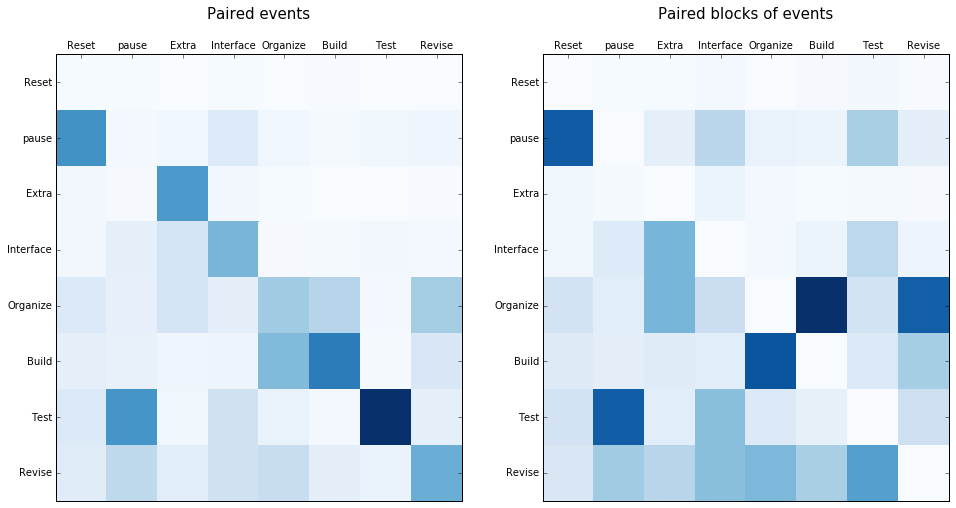

In [111]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax = axs[0]
heatmap = ax.pcolor(df_actions, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(df_actions.columns, minor=False)
ax.set_yticklabels(df_actions.index, minor=False)
plt.text(0.5, 1.08, "Paired events",fontsize=15,horizontalalignment='center',transform = ax.transAxes)
ax = axs[1]
heatmap = ax.pcolor(df_actions_blocks, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(df_actions_blocks.columns, minor=False)
ax.set_yticklabels(df_actions_blocks.index, minor=False)
plt.text(0.5, 1.08, "Paired blocks of events",fontsize=15,horizontalalignment='center',transform = ax.transAxes)
plt.show()

In [112]:
times =  list(df2[df2['Student#']==10009106]['Time Stamp'])
timeblocks = [times[x] for x in range(1,len(times)+2,len(times)/4)]
timeblocks.pop(0)
data_time = np.zeros((len(families),len(timeblocks)), dtype='float')
def find_index(time):
    i=0
    while time >= timeblocks[i]:
        i+=1
        if i+1==len(timeblocks): break
    return i

for time,family in zip(times,sequence):
    if i +1 < len(sequence):
        if families.index(family) != families.index(sequence[i+1]):
            data_time[families.index(family)][find_index(time)] += 1
    
data_time

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

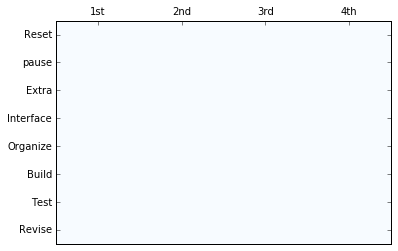

In [113]:
column_labels = families
row_labels = ["1st","2nd","3rd","4th"]
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_time, cmap=plt.cm.Blues)

# # put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data_time.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data_time.shape[0])+0.5, minor=False)

#want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show() 

Next tasks:
1. collapse df to block of actions
* redo plots
* import survey and knowledge test data
* create a dictionary with key = studentid, values =
    * pre-test
    * post-test
    * pre-att
    * post-att
    * cluster
* recreate above graphs splitting students by:
    * cluster
    * high knowledge - low knowledge
    * high att - low att
    * learning gains
    * attitude gains (shifts up or down)
    